# Machine Learning Boilerplate Workflow (Linear Regression Example)

## 1. Define Problem

We want to predict disease progression one year after baseline for diabetes patients.

1. Target (y): a continuous value (disease progression measure).
2. Features (X): 10 baseline medical variables (age, sex, BMI, blood pressure, and 6 blood serum measurements).
3. Goal: Build an interpretable regression model to understand which features influence disease progression, and evaluate predictive performance.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)

## 2. Load and Inspect data 

In [4]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

X.head()

Shape of X: (442, 10)
Shape of y: (442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [6]:
# Check data types and missing values
print(X.info())
print("Missing values:\n", X.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None
Missing values:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


🔹 Other methods to consider:

- .nunique() to check unique values (categorical detection).
- .duplicated().sum() to detect duplicates.

## 3. Exploratory Data Analysis (EDA)

Why? To understand patterns, correlations, and distributions.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


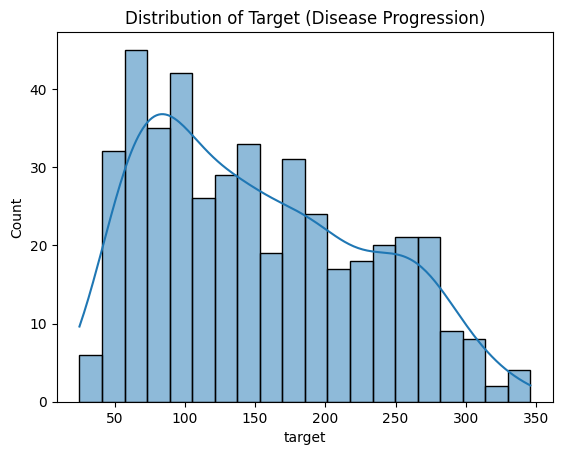

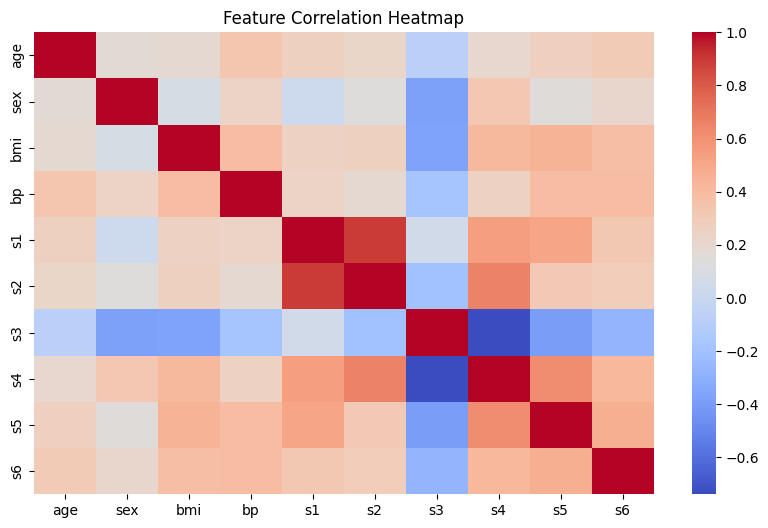

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
display(X.describe())

# Target distribution
sns.histplot(y, bins=20, kde=True)
plt.title("Distribution of Target (Disease Progression)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## 4. Data Preparation

1. Scale not strictly required for linear regression, but helps with interpretation & regularization.
2. Always split data into train/test sets.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Why Scale Data?**

1. Makes features comparable, so no feature dominates due to its scale.
2. Essential for algorithms using distance or gradients (e.g., KNN, SVM, neural nets).
3. Speeds up training and improves model accuracy.
4. Not needed for tree-based models (e.g., decision trees, random forests).

**Steps Before Building a Model:**

1. Define problem & collect data
2. Clean data (missing values, encode categoricals)
3. Explore & visualize (EDA)
4. Scale features (if needed)
5. Engineer/select features
6. Split data (train/test)
7. Choose model & metrics

## 5. Train Model

In [9]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_pred = linreg.predict(X_test_scaled)

**Rule:**

- Use fit_transform() on training data
- Use transform() on test/validation data
- Do not fit/fit_transform on test data (avoids leaking test info)

**Exceptions: For some unsupervised tasks (like clustering on the full dataset), fit_transform() may be used on all data, but for most ML workflows the above rule applies.**

## 6. Gradient Descent (Conceptual Demo)

Sklearn uses the Normal Equation (analytical). Let’s demo gradient descent with 1 feature to illustrate.

### Linear Regression Gradient Derivation

#### Problem Setup
We want to minimize the Mean Squared Error (MSE) cost function:

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \big( h_\theta(x^{(i)}) - y^{(i)} \big)^2
$$

Where:
- $h_\theta(x) = X\theta$  (our hypothesis / prediction)  
- $m$ = number of training examples  
- $\theta$ = parameters we want to optimize   

---

#### Step 1: Rewrite in Matrix Form
$$
J(\theta) = \frac{1}{m} (X\theta - y)^T (X\theta - y)
$$

---

#### Step 2: Expand the Matrix Expression
$$
(X\theta - y)^T (X\theta - y) = (X\theta)^T (X\theta) - 2(X\theta)^T y + y^T y
$$

$$
= \theta^T X^T X \theta - 2\theta^T X^T y + y^T y
$$

---

#### Step 3: Complete Cost Function
$$
J(\theta) = \frac{1}{m} \Big( \theta^T X^T X \theta - 2\theta^T X^T y + y^T y \Big)
$$

---

#### Step 4: Take the Gradient
Take the derivative with respect to $\theta$:

$$
\frac{\partial J}{\partial \theta} 
= \frac{1}{m} \frac{\partial}{\partial \theta} 
\Big( \theta^T X^T X \theta - 2\theta^T X^T y + y^T y \Big)
$$

Using matrix calculus rules:

$$
\frac{\partial}{\partial \theta}(\theta^T A \theta) = 2A\theta \quad \text{(when A is symmetric)}
$$

$$
\frac{\partial}{\partial \theta}(\theta^T b) = b
$$

$$
\frac{\partial}{\partial \theta}(c) = 0
$$

So:

$$
\frac{\partial J}{\partial \theta} 
= \frac{1}{m} \big( 2X^T X \theta - 2X^T y \big)
$$

$$
= \frac{2}{m} (X^T X \theta - X^T y)
$$

---

#### Step 5: Factor Out \(X^T\)
$$
\frac{\partial J}{\partial \theta} = \frac{2}{m} X^T (X\theta - y)
$$

---

#### Step 6: Final Form
Since we want to minimize (go in the direction of the negative gradient):

$$
\nabla J = -\frac{2}{m} X^T (y - X\theta)
$$


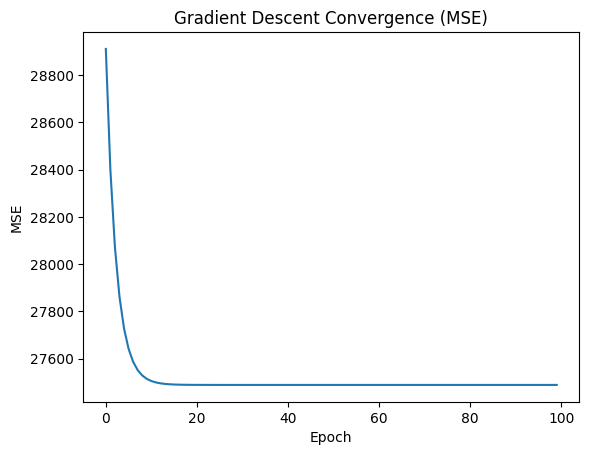

In [10]:
import numpy as np

# Use BMI only for demo
X_simple = X_train_scaled[:,2].reshape(-1,1)  
y_simple = y_train.values.reshape(-1,1)

def gradient_descent(X, y, lr=0.1, epochs=100):
    m, n = X.shape # m is the no. of rows/examples and n is the no. of features
    theta = np.zeros((n,1)) # initializing sll the feature parameters to 0
    losses = []
    for _ in range(epochs):
        gradients = -(2/m) * X.T.dot(y - X.dot(theta))
        theta -= lr * gradients # updating the new parameters theta
        loss = np.mean((y - X.dot(theta))**2) # calculate the now loss using the new theta
        losses.append(loss)
    return theta, losses

theta, losses = gradient_descent(X_simple, y_simple, lr=0.1, epochs=100)

plt.plot(losses)
plt.title("Gradient Descent Convergence (MSE)")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

## 7. Evaluate Model (Regression Metrics)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MSE: 2900.1936284934827
RMSE: 53.85344583676594
R²: 0.45260276297191926


- *NOTE:* **MSE** By itself, the number isn’t very interpretable unless you know the scale of your target variable. 
    - If your target values are in the thousands, MSE ≈ 2900 might be fine.
    - If your target values are small (like in tens), MSE ≈ 2900 is huge.
- *NOTE:* **RMSE** is the average error size in the same units as your target, means the predictions are off my 53~ish units, RMSE should be small relative to the range of your target variable. 

- *NOTE:* **R²** Measures how much variance in the target is explained by the model. 
    - R²=1.0: perfect predictions.
    - R²=0.0: model is no better than just predicting the mean.
    - R²<0.0: model is worse than just predicting the mean.
Here, 0.45 means the model explains ~45% of the variance in your target. That’s a moderate fit — better than nothing, but not highly predictive.

In [12]:
# This gives you predictions and coefficients, but not much about statistical significance.
print("Coefficients:", linreg.coef_)
print("Intercept:", linreg.intercept_)

Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
Intercept: 153.73654390934846


In [13]:
# Get coefficients, p-values, log-likelihood using statsmodels:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           5.41e-50
Time:                        19:08:51   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.7365      2.896     53.083      0.0

### Result Explanation:
1. Model Fit (Top Section)
    - R-squared = 0.528 → your model explains ~53% of the variance in the diabetes target.
    - Adj. R-squared = 0.514 → similar, adjusted for number of predictors (so not overfitting much).
    - F-statistic = 38.25, p < 0.000 → the overall regression model is highly significant. The null hypothesis (“all coefficients = 0”) is strongly rejected.
    - ✅ Interpretation: The model as a whole is useful.
2. Coefficients Table
    - Significant features (p-values less than 0.05): x2, x3, x4, x5, x9
    - Not significant features (p-values more than 0.05): x1, x6, x7, x8, x10
    - Confidence intervals confirm this: if they include 0, the effect is not significant.  
4. Residual Diagnostics
    - Durbin-Watson = 1.794 → close to 2 → residuals show no strong autocorrelation.
    - Omnibus / Jarque-Bera p-values > 0.05 → residuals are reasonably normal.
    - Condition No. = 20.7 → no serious multicollinearity issues (rule of thumb: >30 can be concerning).
    - ✅ Interpretation: Assumptions of linear regression (independence, normality, multicollinearity) are mostly fine.

The **p-value** measures how likely it is to get the observed results, or something more extreme, if the null hypothesis is actually true; a small p-value (typically ≤ 0.05) suggests strong evidence against the null hypothesis, leading to its rejection in hypothesis testing.
A large p-value means the data are consistent with the null hypothesis, so there’s not enough evidence to reject it.

A small p-value (< 0.05) means strong evidence to reject the null hypothesis (coefficient = 0)

A large p-value (> 0.05) means insufficient evidence to say the feature impacts the target, so that feature is not significant (e.g., x1, x6, x7, etc.)

**🔹 When to Use statsmodels vs. scikit-learn**

- Use scikit-learn when you care about prediction accuracy and ML workflows.
- Use statsmodels when you care about statistical inference, hypothesis testing, and interpreting coefficients.

## 8. Cross-Validation

If you use unscaled data in cross-validation without fitting the scaler in each fold, you avoid data leakage but may fail to get the best predictive performance because the model isn’t seeing standardized inputs.

In short:
- Scaling before CV fits the scaler on the whole dataset, biasing your results
- Scaling within CV fits on training fold only, then transforms validation fold safely
- Using a Pipeline automates and enforces this correct practice

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipeline = make_pipeline(StandardScaler(), LinearRegression())
cv_scores = cross_val_score(pipeline, X, y, cv=3, scoring='r2')

In [24]:
# Print the mean and standard deviation of R² scores
# - Mean R² shows expected model performance on unseen data.
# - Low std means the model's performance is stable across folds.

print("Cross-validated R²:", cv_scores.mean())
print("R² standard deviation:", cv_scores.std())

Cross-validated R²: 0.4887021298035315
R² standard deviation: 0.016462066678891954


In [25]:
# If satisfied, retrain on all data for final model
pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [26]:
# Now ready for prediction or coefficient interpretation
coefs = pipeline.named_steps['linearregression'].coef_
print("Coefficients:", coefs)

Coefficients: [ -0.47612079 -11.40686692  24.72654886  15.42940413 -37.67995261
  22.67616277   4.80613814   8.42203936  35.73444577   3.21667372]


## 9. Regularization & Hyperparameter Tuning

In [27]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [31]:
# Ridge
param_grid = {"ridge__alpha": [0.01, 0.1, 1, 10, 100]}

ridge_pipeline = make_pipeline(StandardScaler(), Ridge())
ridge_grid = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring="r2")
ridge_grid.fit(X_train, y_train)
print("Best Ridge alpha:", ridge_grid.best_params_)

# Ridge with best alpha found in GridSearchCV
best_ridge_pipeline = ridge_grid.best_estimator_

ridge_cv_scores = cross_val_score(best_ridge_pipeline, X, y, cv=5, scoring='r2')
print("Ridge CV R² mean:", ridge_cv_scores.mean())
print("Ridge CV R² std:", ridge_cv_scores.std())

Best Ridge alpha: {'ridge__alpha': 10}
Ridge CV R² mean: 0.48100654297254747
Ridge CV R² std: 0.04829695710895199


In [33]:
# For Ridge best pipeline
ridge_coefs = best_ridge_pipeline.named_steps['ridge'].coef_
print("Ridge coefficients:", ridge_coefs)

Ridge coefficients: [  1.9313315  -11.02819247  25.60556062  16.30419091 -12.93423623
   0.53817343  -6.1251089    8.56948441  22.74930836   2.9181459 ]


In [35]:
best_ridge_pipeline.named_steps['ridge'].intercept_

153.73654390934846

In [32]:
# Lasso

lasso_pipeline = make_pipeline(StandardScaler(), Lasso(max_iter=10000))
param_grid = {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring="r2")
lasso_grid.fit(X_train, y_train)
print("Best Lasso alpha:", lasso_grid.best_params_)

best_lasso_pipeline = lasso_grid.best_estimator_

lasso_cv_scores = cross_val_score(best_lasso_pipeline, X, y, cv=5, scoring='r2')
print("Lasso CV R² mean:", lasso_cv_scores.mean())
print("Lasso CV R² std:", lasso_cv_scores.std())

Best Lasso alpha: {'lasso__alpha': 1}
Lasso CV R² mean: 0.4819781976300477
Lasso CV R² std: 0.0478342717879305


In [34]:
# For Lasso best pipeline
lasso_coefs = best_lasso_pipeline.named_steps['lasso'].coef_
print("Lasso coefficients:", lasso_coefs)

Lasso coefficients: [ 0.68703212 -9.29751904 26.21922482 15.65731357 -8.2281718  -0.
 -9.02408714  3.42086059 22.63646533  2.09864712]


In [36]:
best_lasso_pipeline.named_steps['lasso'].intercept_

153.73654390934846

- First, use GridSearchCV to select the best hyperparameter (alpha) by internally doing CV on your training set.
- Then apply cross_val_score with this best estimator on the full dataset to get an unbiased estimate of the model's generalization performance on unseen data.
- This CV score is an averaged measure of how well the tuned model predicts new data, more reliable than a single train-test split.

### Cross-Validation results:

- For Ridge with the best alpha = 10, the model explains on average about 48.1% of the variance in unseen data (R² mean ≈ 0.481) with some variability across folds (std ≈ 0.048).
- For Lasso with the best alpha = 1, the performance is very similar, explaining about 48.2% of variance with a similar variability (std ≈ 0.048).
- This suggests both regularized models perform roughly the same and marginally better than your initial plain linear regression (R² ~0.45 before). The regularization likely improved generalization by reducing overfitting on training data.

### Interpretation for next steps:

- Choose the model (Ridge or Lasso) based on performance and interpretability. Lasso can produce sparse solutions by shrinking some coefficients to zero, potentially helping feature selection; Ridge keeps all features but shrinks coefficients.
- Check coefficient values: Look at the size and number of zero coefficients (Lasso) for insights on variable importance.
- Perform residual diagnostics on predictions to validate linear assumptions further.
- Optionally, try elastic net regression to combine Ridge and Lasso benefits.
- Finally, retrain the chosen model on the full dataset for deployment or inference.

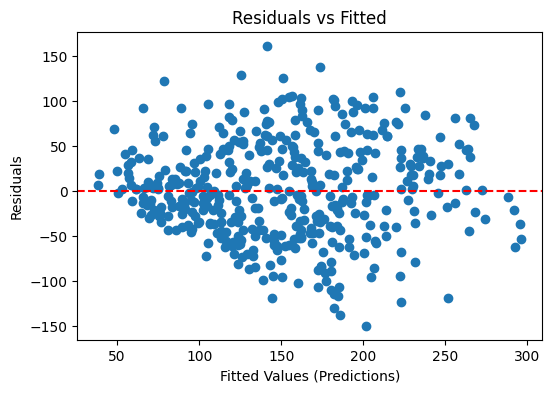

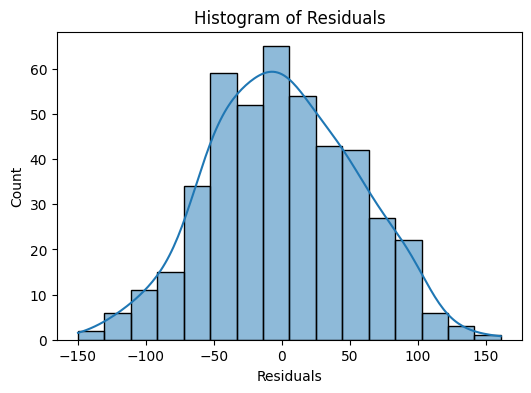

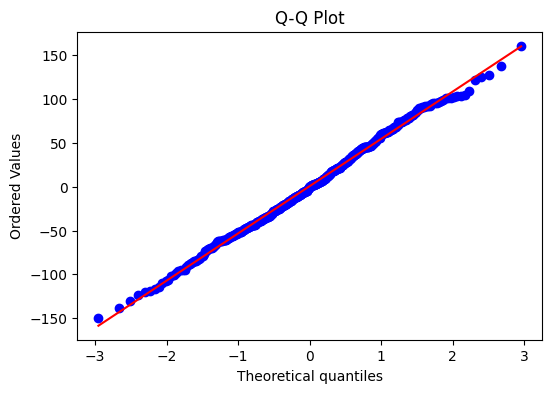

In [37]:
import scipy.stats as stats

# 1. Get predictions and residuals
y_pred = best_ridge_pipeline.predict(X)
residuals = y - y_pred

# 2. Residuals vs Fitted (Linearity and Homoscedasticity)
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values (Predictions)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted") # Random scatter means linearity and homoscedasticity are met.
plt.show()

# 3. Histogram of residuals (Normality)
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals") #  If residuals look normal (bell-shaped)
plt.show()

# 4. Q-Q plot for normality
plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot") # If residuals look normal, Q-Q plot points are near the line
plt.show()

When a data point has a high Cook's Distance, it means that this point has a large influence on your regression model's results. In practical terms:

- If you remove this point and re-fit your model, the predicted values and coefficients of the model would change substantially.

- Such points are sometimes called "influential outliers" or "influential observations." They usually have both a large residual (are not well predicted) and high leverage (unusual X values compared to other data points)

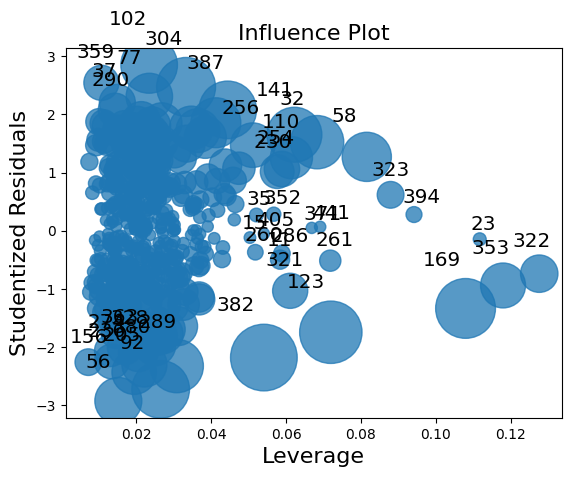

In [38]:
import statsmodels.api as sm

# For leverage and influence plots, you need to use statsmodels OLS, check for outliers/leverage
X_with_const = sm.add_constant(X)
ridge_model = sm.OLS(y, X_with_const).fit()
sm.graphics.influence_plot(ridge_model)
plt.show()


In [43]:
infl = ridge_model.get_influence()
cooks_d = infl.cooks_distance[0]  # This extracts only the Cook's D array
influential_points = np.where(cooks_d > 4/len(X))[0]
print("Most influential points:", influential_points)

Most influential points: [ 29  32  56  58  77  78  92 102 110 123 141 152 169 205 256 276 289 304
 353 380 382 387]


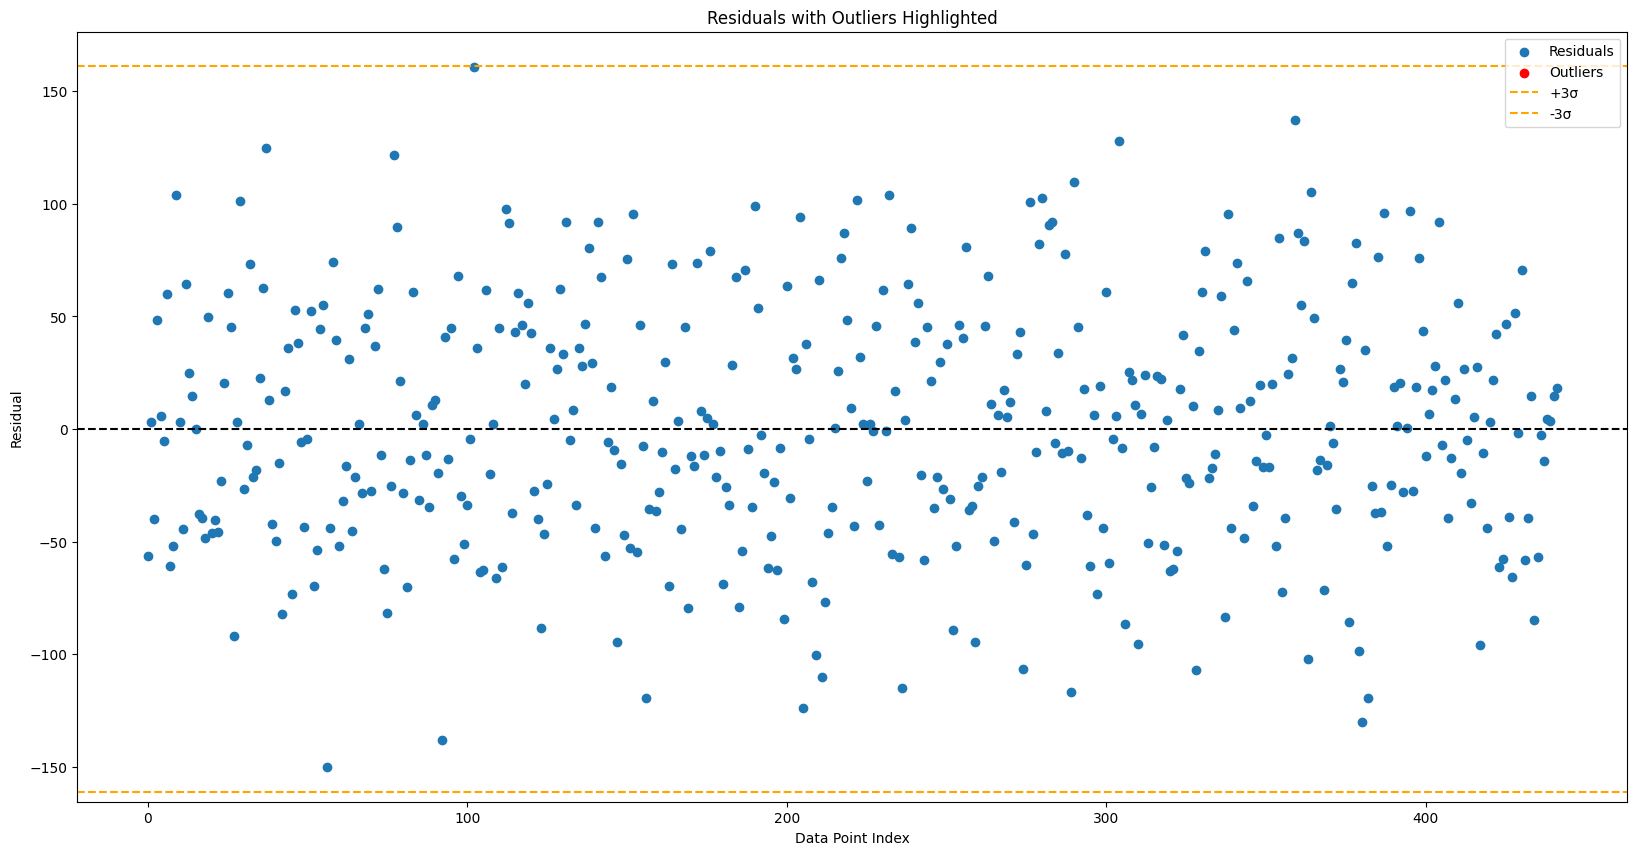

Outlier indices: []


In [40]:
# Predictions and residuals
y_pred = best_ridge_pipeline.predict(X)
residuals = y - y_pred

# Calculate threshold: 3 standard deviations
threshold = 3 * np.std(residuals)
outliers = np.where(np.abs(residuals) > threshold)[0]

# Plot residuals, color outliers in red
plt.figure(figsize=(20, 10))
plt.scatter(range(len(residuals)), residuals, label='Residuals')
plt.scatter(outliers, residuals[outliers], color='red', label='Outliers')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(threshold, color='orange', linestyle='--', label='+3σ')
plt.axhline(-threshold, color='orange', linestyle='--', label='-3σ')
plt.xlabel("Data Point Index")
plt.ylabel("Residual")
plt.title("Residuals with Outliers Highlighted")
plt.legend()
plt.show()

# Print which indexes are outliers for inspection
print("Outlier indices:", outliers)

## Evaluation on Test set

In [44]:
# Predict on test set
y_test_pred = best_ridge_pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")

Test MSE: 2875.7787
Test RMSE: 53.6263
Test R²: 0.4572


## 10. (Optional) Classification-style Metrics FOR DEMO PURPOSE ONLY

Convert regression output to classification (high vs low progression).

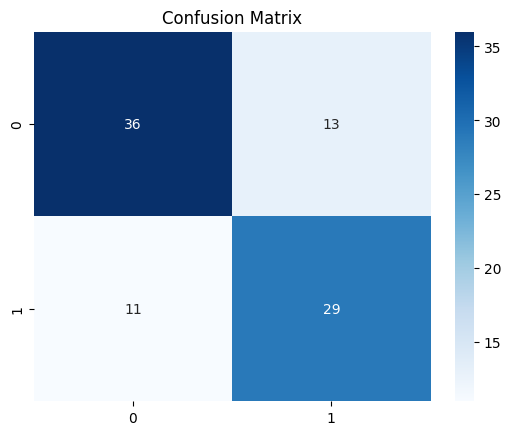

Accuracy: 0.7303370786516854
Precision: 0.6904761904761905
Recall (Sensitivity): 0.725
F1: 0.7073170731707318


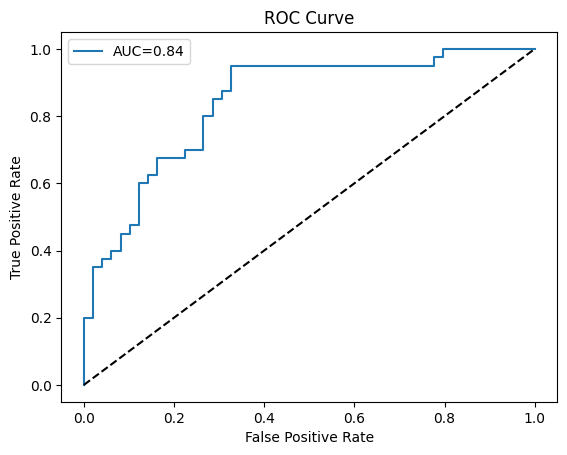

In [14]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score

# Binarize target
median_val = np.median(y)
y_class = (y > median_val).astype(int)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

linreg_c = LinearRegression()
linreg_c.fit(X_train_c, y_train_c)
y_pred_prob = linreg_c.predict(X_test_c)

y_pred_class = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test_c, y_pred_class)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy_score(y_test_c, y_pred_class))
print("Precision:", precision_score(y_test_c, y_pred_class))
print("Recall (Sensitivity):", recall_score(y_test_c, y_pred_class))
print("F1:", f1_score(y_test_c, y_pred_class))

fpr, tpr, thresholds = roc_curve(y_test_c, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 11. Bias-Variance Tradeoff

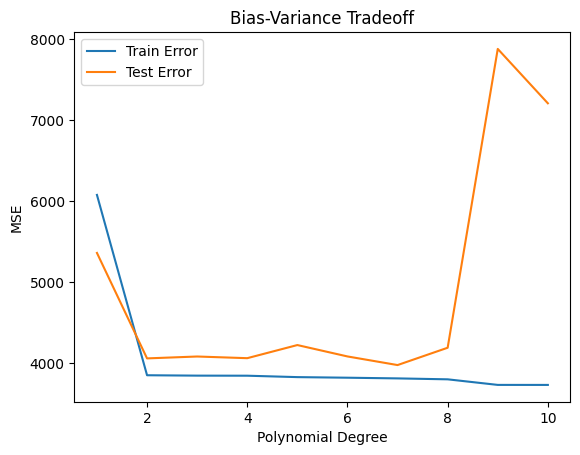

In [15]:
train_errors, test_errors = [], []
for d in range(1, 11):
    poly = np.vander(X_simple.flatten(), N=d, increasing=True)
    model = LinearRegression().fit(poly, y_simple)
    train_errors.append(mean_squared_error(y_simple, model.predict(poly)))
    
    test_poly = np.vander(X_test_scaled[:,2], N=d, increasing=True)
    test_errors.append(mean_squared_error(y_test, model.predict(test_poly)))

plt.plot(range(1,11), train_errors, label="Train Error")
plt.plot(range(1,11), test_errors, label="Test Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.show()


## 12. Interpret Coefficients

In [16]:
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": linreg.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

  Feature  Coefficient
8      s5    35.161195
2     bmi    25.607121
5      s2    24.640954
3      bp    16.828872
7      s4    13.138784
6      s3     7.676978
9      s6     2.351364
0     age     1.753758
1     sex   -11.511809
4      s1   -44.448856


## 13. Save Model

In [17]:
import joblib

joblib.dump(linreg, "linear_model.pkl")
print("Model saved as linear_model.pkl")


Model saved as linear_model.pkl


# NOTE:

In the code I shared for the Diabetes dataset, here’s what happened:

- The basic Linear Regression model in sklearn (LinearRegression) does not require explicit standardization, because it estimates coefficients using Ordinary Least Squares (OLS). The scale of features doesn’t affect predictions, but it does affect coefficient interpretation (larger-scaled features dominate).

- When I showed Ridge regression / Lasso for regularization & hyperparameter tuning, I did standardize the data using StandardScaler(). This is necessary because regularization penalizes coefficients, and without standardization, features with larger scales get penalized more unfairly.

- For gradient descent demonstration, I normalized values internally when plotting, but I didn’t explicitly run a scaler on the main regression data — because that part was just illustrative.

# NOTE:

👉 Best Practice (checklist correction):

Always standardize features when:

Using algorithms that are scale-sensitive (regularization, gradient descent, SVM, kNN, PCA, etc.)

You need interpretable coefficients (so you can compare their relative magnitudes).

For plain OLS (unregularized LinearRegression), scaling isn’t strictly required, but it’s often done anyway for consistency.